In [57]:
import pandas as pd
DATA_FILE = 'uber-raw-data-apr14.csv'
uber_data = pd.read_csv(DATA_FILE)
uber_data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [79]:
import glob
import os

path =r'./' # use your path
all_files = glob.glob(path + "/*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))

In [80]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")
df['MonthDayNum'] = df['Date/Time'].dt.day
df['HourOfDay'] = df['Date/Time'].dt.hour

In [1]:
df_MonthDay = df.pivot_table(index=['MonthDayNum'],
                                  values='Base',
                                  aggfunc='count')
df_MonthDay = df_MonthDay/6;
df_MonthDay.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Month Day');

NameError: name 'df' is not defined

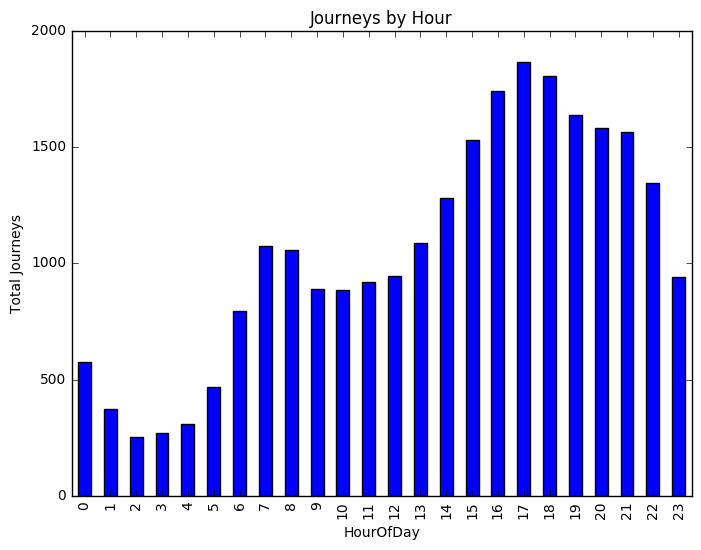

In [96]:
df_HourDay = df.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
df_HourDay =  df_HourDay/180
df_HourDay.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Hour');

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 6 columns):
Date/Time      datetime64[ns]
Lat            float64
Lon            float64
Base           object
MonthDayNum    int64
HourOfDay      int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 242.2+ MB


In [94]:
type(df_HourDay)


In [95]:
for i in df_HourDay:
    print(i)

576.866666667
373.483333333
254.805555556
268.261111111
306.833333333
466.327777778
795.627777778
1072.74444444
1058.35555556
888.705555556
884.155555556
920.572222222
946.955555556
1088.20555556
1281.25
1530.36666667
1741.11111111
1867.72222222
1803.77222222
1636.18333333
1581.13333333
1563.66666667
1343.65555556
939.944444444
